## Keras DNN 실습과제 답안 - 03
### Multi-Classification , 'iris.csv'

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
tf.random.set_seed(5)
np.random.seed(5)

In [2]:
species_list =['"setosa"','"versicolor"','"virginica"']

xy = np.loadtxt('iris.csv',delimiter=',',dtype=np.str,skiprows=1)
xy.shape

(150, 6)

In [3]:
x_train = np.float32(xy[:35,1:-1])
x_train = np.append(x_train , np.float32(xy[50:85,1:-1]),0)
x_train = np.append(x_train , np.float32(xy[100:135,1:-1]),0) # [105,4]

y_train = xy[:35,[-1] ]
y_train = np.append(y_train, xy[50:85,[-1]],0)
y_train = np.append(y_train, xy[100:135,[-1]],0) # [105,1]

for i in range(105):
    y_train[i,-1] = np.int32(species_list.index(y_train[i,-1]))
print(x_train.shape,y_train.shape)

(105, 4) (105, 1)


In [4]:
x_test = np.float32(xy[35:50,1:-1])
x_test = np.append(x_test , np.float32(xy[85:100,1:-1]),0)
x_test = np.append(x_test , np.float32(xy[135:,1:-1]),0) # [45,4]

y_test = xy[35:50,[-1] ]
y_test = np.append(y_test, xy[85:100,[-1]],0)
y_test = np.append(y_test, xy[135:,[-1]],0) # [45,1]

for i in range(45):
    y_test[i,-1] = np.int32(species_list.index(y_test[i,-1]))

print(x_test.shape, y_test.shape)

(45, 4) (45, 1)


In [5]:
# one-hot 인코딩
nb_classes = 3

# y_train = np.array(y_train,dtype=np.int32)   # Keras에서는 정수로 변환 불필요
y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)

# y_test = np.array(y_test,dtype=np.int32)     # Keras에서는 정수로 변환 불필요
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)

In [6]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, input_shape=[4,],activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 학습
history = model.fit(x_train, y_train, epochs=700)

Epoch 1/700
4/4 [==============================] - 0s 1ms/step - loss: 1.8383 - accuracy: 0.3333
Epoch 2/700
4/4 [==============================] - 0s 1ms/step - loss: 1.6799 - accuracy: 0.3333
Epoch 3/700
4/4 [==============================] - 0s 2ms/step - loss: 1.5503 - accuracy: 0.3333
Epoch 4/700
4/4 [==============================] - 0s 1ms/step - loss: 1.4494 - accuracy: 0.4667
Epoch 5/700
4/4 [==============================] - 0s 997us/step - loss: 1.3619 - accuracy: 0.6476
Epoch 6/700
4/4 [==============================] - 0s 996us/step - loss: 1.2936 - accuracy: 0.6667
Epoch 7/700
4/4 [==============================] - 0s 2ms/step - loss: 1.2323 - accuracy: 0.6286
Epoch 8/700
4/4 [==============================] - 0s 1ms/step - loss: 1.1799 - accuracy: 0.5333
Epoch 9/700
4/4 [==============================] - 0s 998us/step - loss: 1.1406 - accuracy: 0.3714
Epoch 10/700
4/4 [==============================] - 0s 1ms/step - loss: 1.1049 - accuracy: 0.3333
Epoch 11/700
4/4 [=====

4/4 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.9429
Epoch 165/700
4/4 [==============================] - 0s 666us/step - loss: 0.3677 - accuracy: 0.9429
Epoch 166/700
4/4 [==============================] - 0s 997us/step - loss: 0.3657 - accuracy: 0.9429
Epoch 167/700
4/4 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.9429
Epoch 168/700
4/4 [==============================] - 0s 665us/step - loss: 0.3631 - accuracy: 0.9524
Epoch 169/700
4/4 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.9429
Epoch 170/700
4/4 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.9429
Epoch 171/700
4/4 [==============================] - 0s 665us/step - loss: 0.3584 - accuracy: 0.9429
Epoch 172/700
4/4 [==============================] - 0s 997us/step - loss: 0.3569 - accuracy: 0.9429
Epoch 173/700
4/4 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.9429
Epoch 174/700


4/4 [==============================] - 0s 998us/step - loss: 0.1953 - accuracy: 0.9524
Epoch 327/700
4/4 [==============================] - 0s 998us/step - loss: 0.1947 - accuracy: 0.9524
Epoch 328/700
4/4 [==============================] - 0s 988us/step - loss: 0.1942 - accuracy: 0.9524
Epoch 329/700
4/4 [==============================] - 0s 986us/step - loss: 0.1938 - accuracy: 0.9524
Epoch 330/700
4/4 [==============================] - 0s 665us/step - loss: 0.1948 - accuracy: 0.9619
Epoch 331/700
4/4 [==============================] - 0s 665us/step - loss: 0.1937 - accuracy: 0.9619
Epoch 332/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9524
Epoch 333/700
4/4 [==============================] - 0s 665us/step - loss: 0.1912 - accuracy: 0.9619
Epoch 334/700
4/4 [==============================] - 0s 665us/step - loss: 0.1915 - accuracy: 0.9619
Epoch 335/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9619
Epoch 33

4/4 [==============================] - 0s 998us/step - loss: 0.1292 - accuracy: 0.9524
Epoch 489/700
4/4 [==============================] - 0s 997us/step - loss: 0.1297 - accuracy: 0.9810
Epoch 490/700
4/4 [==============================] - 0s 998us/step - loss: 0.1305 - accuracy: 0.9714
Epoch 491/700
4/4 [==============================] - 0s 998us/step - loss: 0.1310 - accuracy: 0.9714
Epoch 492/700
4/4 [==============================] - 0s 997us/step - loss: 0.1308 - accuracy: 0.9714
Epoch 493/700
4/4 [==============================] - 0s 997us/step - loss: 0.1294 - accuracy: 0.9714
Epoch 494/700
4/4 [==============================] - 0s 998us/step - loss: 0.1289 - accuracy: 0.9524
Epoch 495/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9524
Epoch 496/700
4/4 [==============================] - 0s 997us/step - loss: 0.1283 - accuracy: 0.9524
Epoch 497/700
4/4 [==============================] - 0s 665us/step - loss: 0.1278 - accuracy: 0.9524
Epoch 

4/4 [==============================] - 0s 997us/step - loss: 0.1028 - accuracy: 0.9714
Epoch 651/700
4/4 [==============================] - 0s 665us/step - loss: 0.1037 - accuracy: 0.9524
Epoch 652/700
4/4 [==============================] - 0s 665us/step - loss: 0.1036 - accuracy: 0.9524
Epoch 653/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1056 - accuracy: 0.9524
Epoch 654/700
4/4 [==============================] - 0s 997us/step - loss: 0.1057 - accuracy: 0.9619
Epoch 655/700
4/4 [==============================] - 0s 998us/step - loss: 0.1037 - accuracy: 0.9524
Epoch 656/700
4/4 [==============================] - 0s 665us/step - loss: 0.1029 - accuracy: 0.9524
Epoch 657/700
4/4 [==============================] - 0s 997us/step - loss: 0.1026 - accuracy: 0.9714
Epoch 658/700
4/4 [==============================] - 0s 665us/step - loss: 0.1026 - accuracy: 0.9810
Epoch 659/700
4/4 [==============================] - 0s 998us/step - loss: 0.1024 - accuracy: 0.9714
Epoch 

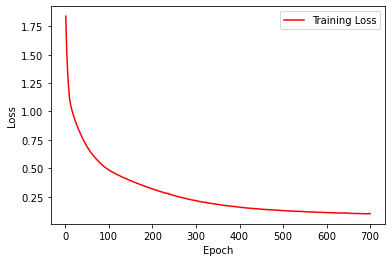

In [8]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [9]:
# 평가

accuracy = model.evaluate(x_test, y_test)

print('Accuracy',accuracy[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 1.0000
Accuracy 1.0


## 모델 개선 : 3 layers

In [10]:
tf.keras.backend.clear_session()
tf.random.set_seed(5)
np.random.seed(5)

In [11]:
# 모델 구현
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=40, input_shape=[4,],activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=3,activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 63        
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 학습
history = model.fit(x_train, y_train, epochs=700)

Epoch 1/700
4/4 [==============================] - 0s 1ms/step - loss: 1.0667 - accuracy: 0.3333
Epoch 2/700
4/4 [==============================] - 0s 1ms/step - loss: 1.0113 - accuracy: 0.3524
Epoch 3/700
4/4 [==============================] - 0s 1ms/step - loss: 0.9870 - accuracy: 0.4190
Epoch 4/700
4/4 [==============================] - 0s 1ms/step - loss: 0.9620 - accuracy: 0.4857
Epoch 5/700
4/4 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.5048
Epoch 6/700
4/4 [==============================] - 0s 1ms/step - loss: 0.9019 - accuracy: 0.6095
Epoch 7/700
4/4 [==============================] - 0s 992us/step - loss: 0.8743 - accuracy: 0.6667
Epoch 8/700
4/4 [==============================] - 0s 998us/step - loss: 0.8428 - accuracy: 0.6667
Epoch 9/700
4/4 [==============================] - 0s 1ms/step - loss: 0.8092 - accuracy: 0.7810
Epoch 10/700
4/4 [==============================] - 0s 2ms/step - loss: 0.7771 - accuracy: 0.8667
Epoch 11/700
4/4 [=======

4/4 [==============================] - 0s 997us/step - loss: 0.1481 - accuracy: 0.9619
Epoch 85/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1379 - accuracy: 0.9714
Epoch 86/700
4/4 [==============================] - 0s 998us/step - loss: 0.1435 - accuracy: 0.9429
Epoch 87/700
4/4 [==============================] - 0s 997us/step - loss: 0.1375 - accuracy: 0.9619
Epoch 88/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.9714
Epoch 89/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9619
Epoch 90/700
4/4 [==============================] - 0s 998us/step - loss: 0.1379 - accuracy: 0.9619
Epoch 91/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9619
Epoch 92/700
4/4 [==============================] - 0s 998us/step - loss: 0.1482 - accuracy: 0.9238
Epoch 93/700
4/4 [==============================] - 0s 997us/step - loss: 0.1430 - accuracy: 0.9333
Epoch 94/700
4/4 [===

Epoch 166/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9810
Epoch 167/700
4/4 [==============================] - 0s 998us/step - loss: 0.0953 - accuracy: 0.9810
Epoch 168/700
4/4 [==============================] - 0s 997us/step - loss: 0.0990 - accuracy: 0.9524
Epoch 169/700
4/4 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9429
Epoch 170/700
4/4 [==============================] - 0s 997us/step - loss: 0.0969 - accuracy: 0.9810
Epoch 171/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9714
Epoch 172/700
4/4 [==============================] - 0s 997us/step - loss: 0.0945 - accuracy: 0.9714
Epoch 173/700
4/4 [==============================] - 0s 997us/step - loss: 0.1009 - accuracy: 0.9619
Epoch 174/700
4/4 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 1.00 - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9810
Epoch 175/700
4/4 [==============================] - 0s 6

4/4 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9810
Epoch 330/700
4/4 [==============================] - 0s 998us/step - loss: 0.0833 - accuracy: 0.9714
Epoch 331/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9810
Epoch 332/700
4/4 [==============================] - 0s 997us/step - loss: 0.0912 - accuracy: 0.9333
Epoch 333/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9619
Epoch 334/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9810
Epoch 335/700
4/4 [==============================] - 0s 997us/step - loss: 0.0807 - accuracy: 0.9714
Epoch 336/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9714
Epoch 337/700
4/4 [==============================] - 0s 998us/step - loss: 0.0783 - accuracy: 0.9714
Epoch 338/700
4/4 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9810
Epoch 339/700
4/

4/4 [==============================] - 0s 997us/step - loss: 0.0736 - accuracy: 0.9810
Epoch 492/700
4/4 [==============================] - 0s 998us/step - loss: 0.0726 - accuracy: 0.9810
Epoch 493/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9810
Epoch 494/700
4/4 [==============================] - 0s 998us/step - loss: 0.0743 - accuracy: 0.9714
Epoch 495/700
4/4 [==============================] - 0s 997us/step - loss: 0.0736 - accuracy: 0.9714
Epoch 496/700
4/4 [==============================] - 0s 997us/step - loss: 0.0734 - accuracy: 0.9714
Epoch 497/700
4/4 [==============================] - 0s 997us/step - loss: 0.0722 - accuracy: 0.9714
Epoch 498/700
4/4 [==============================] - 0s 997us/step - loss: 0.0760 - accuracy: 0.9810
Epoch 499/700
4/4 [==============================] - 0s 997us/step - loss: 0.0746 - accuracy: 0.9810
Epoch 500/700
4/4 [==============================] - 0s 998us/step - loss: 0.0741 - accuracy: 0.9810
Epoch 

4/4 [==============================] - 0s 997us/step - loss: 0.0730 - accuracy: 0.9714
Epoch 654/700
4/4 [==============================] - 0s 998us/step - loss: 0.0754 - accuracy: 0.9714
Epoch 655/700
4/4 [==============================] - 0s 997us/step - loss: 0.0682 - accuracy: 0.9714
Epoch 656/700
4/4 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9810
Epoch 657/700
4/4 [==============================] - 0s 998us/step - loss: 0.0734 - accuracy: 0.9714
Epoch 658/700
4/4 [==============================] - 0s 997us/step - loss: 0.0703 - accuracy: 0.9810
Epoch 659/700
4/4 [==============================] - 0s 997us/step - loss: 0.0686 - accuracy: 0.9714
Epoch 660/700
4/4 [==============================] - 0s 997us/step - loss: 0.0751 - accuracy: 0.9714
Epoch 661/700
4/4 [==============================] - 0s 665us/step - loss: 0.0692 - accuracy: 0.9905
Epoch 662/700
4/4 [==============================] - 0s 997us/step - loss: 0.0763 - accuracy: 0.9810
Epoch 

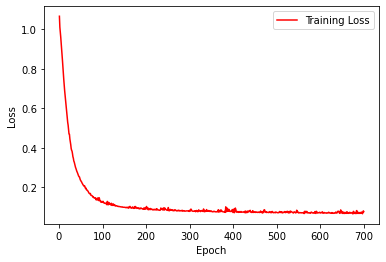

In [13]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [14]:
# 평가
accuracy = model.evaluate(x_test, y_test)

print('Accuracy',accuracy[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 1.0000
Accuracy 1.0
